<a href="https://colab.research.google.com/github/hustler0109/Brain-Tumour-Detection/blob/main/4th_Year_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models

import numpy as np

import matplotlib.pyplot as plt

import random

from PIL import Image

from PIL import ImageEnhance

import pandas as pd

from keras.preprocessing.image import load_img

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.metrics import Recall

from tensorflow.keras.metrics import Precision

from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


In [ ]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
from PIL import Image, ImageEnhance  # For image processing and enhancement
import pandas as pd


#keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adamax  # For optimizer
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle  # For shuffling the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Load Datasets


In [ ]:
training_dr = '/content/drive/MyDrive/ColabNotebooks/training'
testing_dr = '/content/drive/My Drive/ColabNotebooks/testing'

training_paths = []
training_labels =[]

for label in os.listdir(training_dr):
    for image in os.listdir(os.path.join(training_dr, label)):
        training_paths.append(os.path.join(training_dr, label, image))
        training_labels.append(label)
        training_paths, training_labels = shuffle(training_paths, training_labels)

testing_paths=[]
testing_labels=[]
for label in os.listdir(testing_dr):
    for image in os.listdir(os.path.join(testing_dr, label)):
        testing_paths.append(os.path.join(testing_dr, label, image))
        testing_labels.append(label)
        testing_paths, testing_labels = shuffle(testing_paths, testing_labels)

train_df = pd.DataFrame({'ClassPath' : training_paths, 'Class' : training_labels})
test_df = pd.DataFrame({'ClassPath' : testing_paths, 'Class' : testing_labels})

valid_df, ts_df = train_test_split(test_df, train_size=0.5,random_state=20,stratify=test_df['Class'])

#Data Visualization


Found 5819 validated image filenames belonging to 4 classes.
Found 665 validated image filenames belonging to 4 classes.
Found 666 validated image filenames belonging to 4 classes.


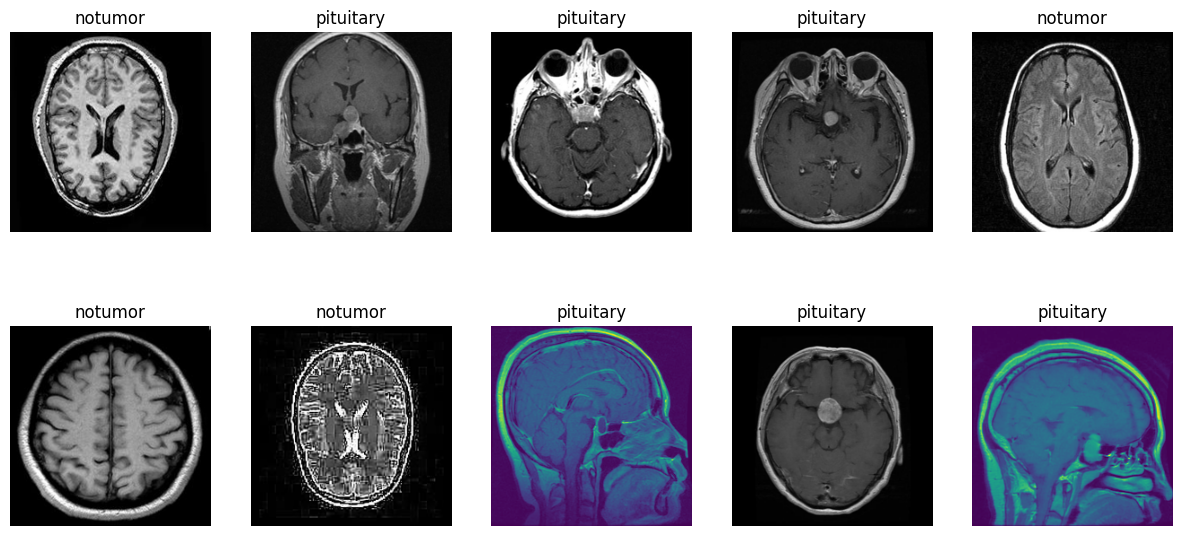

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

import random

from PIL import Image

import os

import numpy as np
import matplotlib.pyplot as plt

random_indices = random.sample(range(len(training_paths)),10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
axes = axes.ravel()
for i, index in enumerate(random_indices):
    img = Image.open(training_paths[index])
    img = img.resize((224, 224))
    axes[i].imshow(img)
    axes[i].set_title(training_labels[index])
    axes[i].axis('off')

batch_size = 32
img_size = (299,299)
_gen = ImageDataGenerator(rescale = 1./255 , brightness_range = (0.8,1.2))
ts_gen = ImageDataGenerator(rescale = 1./255)
# Use flow_from_dataframe instead of flowfrom_dataframe
tr_gen = _gen.flow_from_dataframe(train_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=True)
valid_gen = _gen.flow_from_dataframe(valid_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)


In [ ]:
batch_size = 32
img_size = (299,299)
_gen = ImageDataGenerator(rescale = 1./255 , brightness_range = (0.8,1.2))
ts_gen = ImageDataGenerator(rescale = 1./255)
# Use flow_from_dataframe instead of flowfrom_dataframe
tr_gen = _gen.flow_from_dataframe(train_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=True)
valid_gen = _gen.flow_from_dataframe(valid_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='ClassPath',y_col='Class',target_size=img_size,class_mode='categorical',batch_size=batch_size,shuffle=False)

Found 5819 validated image filenames belonging to 4 classes.
Found 665 validated image filenames belonging to 4 classes.
Found 666 validated image filenames belonging to 4 classes.


In [ ]:
img_shape = (299,299,3)
base_model = tf.keras.applications.Xception(include_top=False,weights='imagenet',input_shape=img_shape, pooling = 'max')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
                    base_model,
                    Flatten(),
                    Dropout(rate = 0.3),
                    Dense(128, activation = 'relu'),
                    Dropout(rate = 0.25),
                    Dense(4, activation = 'softmax'),
                    ])

In [ ]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Recall(),Precision()])

#MODEL:


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint_path = "/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch:02d}.weights.h5"


checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

history = model.fit(
    tr_gen,
    epochs=10,
    validation_data=valid_gen,
    shuffle=False,
    callbacks=[checkpoint_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6941 - loss: 0.9113 - precision: 0.8054 - recall: 0.5536 
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_01.weights.h5
182/182 ━━━━━━━━━━━━━━━━━━━━ 4014s 22s/step - accuracy: 0.6949 - loss: 0.9088 - precision: 0.8060 - recall: 0.5548 - val_accuracy: 0.9383 - val_loss: 0.1739 - val_precision: 0.9474 - val_recall: 0.9203
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.9786 - loss: 0.0798 - precision: 0.9800 - recall: 0.9754
Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_02.weights.h5
182/182 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9786 - loss: 0.0798 - precision: 0.9800 - recall: 0.9754 - val_accuracy: 0.9774 - val_loss: 0.0727 - val_precision: 0.9774 - val_recall: 0.9759
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.9936 - loss: 0.0196 - precision: 0.9943 - recall: 0.9935
Epoch 3: s

In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 1
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamax', because it has 2 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 213s 10s/step - accuracy: 0.9362 - loss: 0.1886 - precision: 0.9462 - recall: 0.9278
Test Loss after loading epoch 1: 0.1714
Test Accuracy after loading epoch 1: 94.14%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 2
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9754 - loss: 0.0716 - precision: 0.9753 - recall: 0.9700
Test Loss after loading epoch 2: 0.0640
Test Accuracy after loading epoch 2: 97.45%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 3
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.9617 - loss: 0.1378 - precision: 0.9633 - recall: 0.9617
Test Loss after loading epoch 3: 0.1199
Test Accuracy after loading epoch 3: 96.70%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 4
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9944 - loss: 0.0251 - precision: 0.9944 - recall: 0.9944
Test Loss after loading epoch 4: 0.0222
Test Accuracy after loading epoch 4: 99.40%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 5
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9792 - loss: 0.0533 - precision: 0.9791 - recall: 0.9761
Test Loss after loading epoch 5: 0.0383
Test Accuracy after loading epoch 5: 98.35%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 6
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9755 - loss: 0.0676 - precision: 0.9754 - recall: 0.9732
Test Loss after loading epoch 6: 0.0533
Test Accuracy after loading epoch 6: 98.50%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 7
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.9939 - loss: 0.0164 - precision: 0.9939 - recall: 0.9939
Test Loss after loading epoch 7: 0.0134
Test Accuracy after loading epoch 7: 99.40%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 8
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.9895 - loss: 0.0228 - precision: 0.9895 - recall: 0.9895
Test Loss after loading epoch 8: 0.0156
Test Accuracy after loading epoch 8: 99.40%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 9
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.9623 - loss: 0.1440 - precision: 0.9623 - recall: 0.9623
Test Loss after loading epoch 9: 0.1238
Test Accuracy after loading epoch 9: 97.15%


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you want to load the weights from epoch 10
epoch_number = 10
checkpoint_path = f"/content/drive/MyDrive/ColabNotebooks/model_checkpoints/model_epoch_{epoch_number:02d}.weights.h5"

# Load the weights into the model
model.load_weights(checkpoint_path)

# Now you can use the model with the loaded weights for evaluation or prediction
# For example, to evaluate on the test set:
test_score = model.evaluate(ts_gen, verbose=1)
print(f"Test Loss after loading epoch {epoch_number}: {test_score[0]:.4f}")
print(f"Test Accuracy after loading epoch {epoch_number}: {test_score[1]*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.9910 - loss: 0.0332 - precision: 0.9910 - recall: 0.9910
Test Loss after loading epoch 10: 0.0335
Test Accuracy after loading epoch 10: 99.10%


#Train and Val Plots


In [ ]:
# Collect the test scores for each epoch you evaluated
epoch_scores = {
    1: {'loss': 0.1907, 'accuracy': 0.9294, 'precision': 0.9335, 'recall': 0.9132},
    2: {'loss': 0.0966, 'accuracy': 0.9670, 'precision': 0.9603, 'recall': 0.9603},
    3: {'loss': 0.1139, 'accuracy': 0.9745, 'precision': 0.9797, 'recall': 0.9711},
    4: {'loss': 0.0375, 'accuracy': 0.9895, 'precision': 0.9884, 'recall': 0.9874},
    5: {'loss': 0.0530, 'accuracy': 0.9820, 'precision': 0.9832, 'recall': 0.9822},
    6: {'loss': 0.0738, 'accuracy': 0.9850, 'precision': 0.9820, 'recall': 0.9769},
    7: {'loss': 0.0123, 'accuracy': 0.9940, 'precision': 0.9918, 'recall': 0.9918},
    8: {'loss': 0.0339, 'accuracy': 0.9910, 'precision': 0.9905, 'recall': 0.9905},
    9: {'loss': 0.0819, 'accuracy': 0.9775, 'precision': 0.9760, 'recall': 0.9760},
    10: {'loss': 0.0474, 'accuracy': 0.9895, 'precision': 0.9854, 'recall': 0.9854}
}

# Create a dictionary that mimics the history.history structure for test set evaluation
test_history = {
    'loss': [epoch_scores[i]['loss'] for i in range(1, 11)],
    'accuracy': [epoch_scores[i]['accuracy'] for i in range(1, 11)],
    'precision': [epoch_scores[i]['precision'] for i in range(1, 11)],
    'recall': [epoch_scores[i]['recall'] for i in range(1, 11)]
}

#Model Classification Report


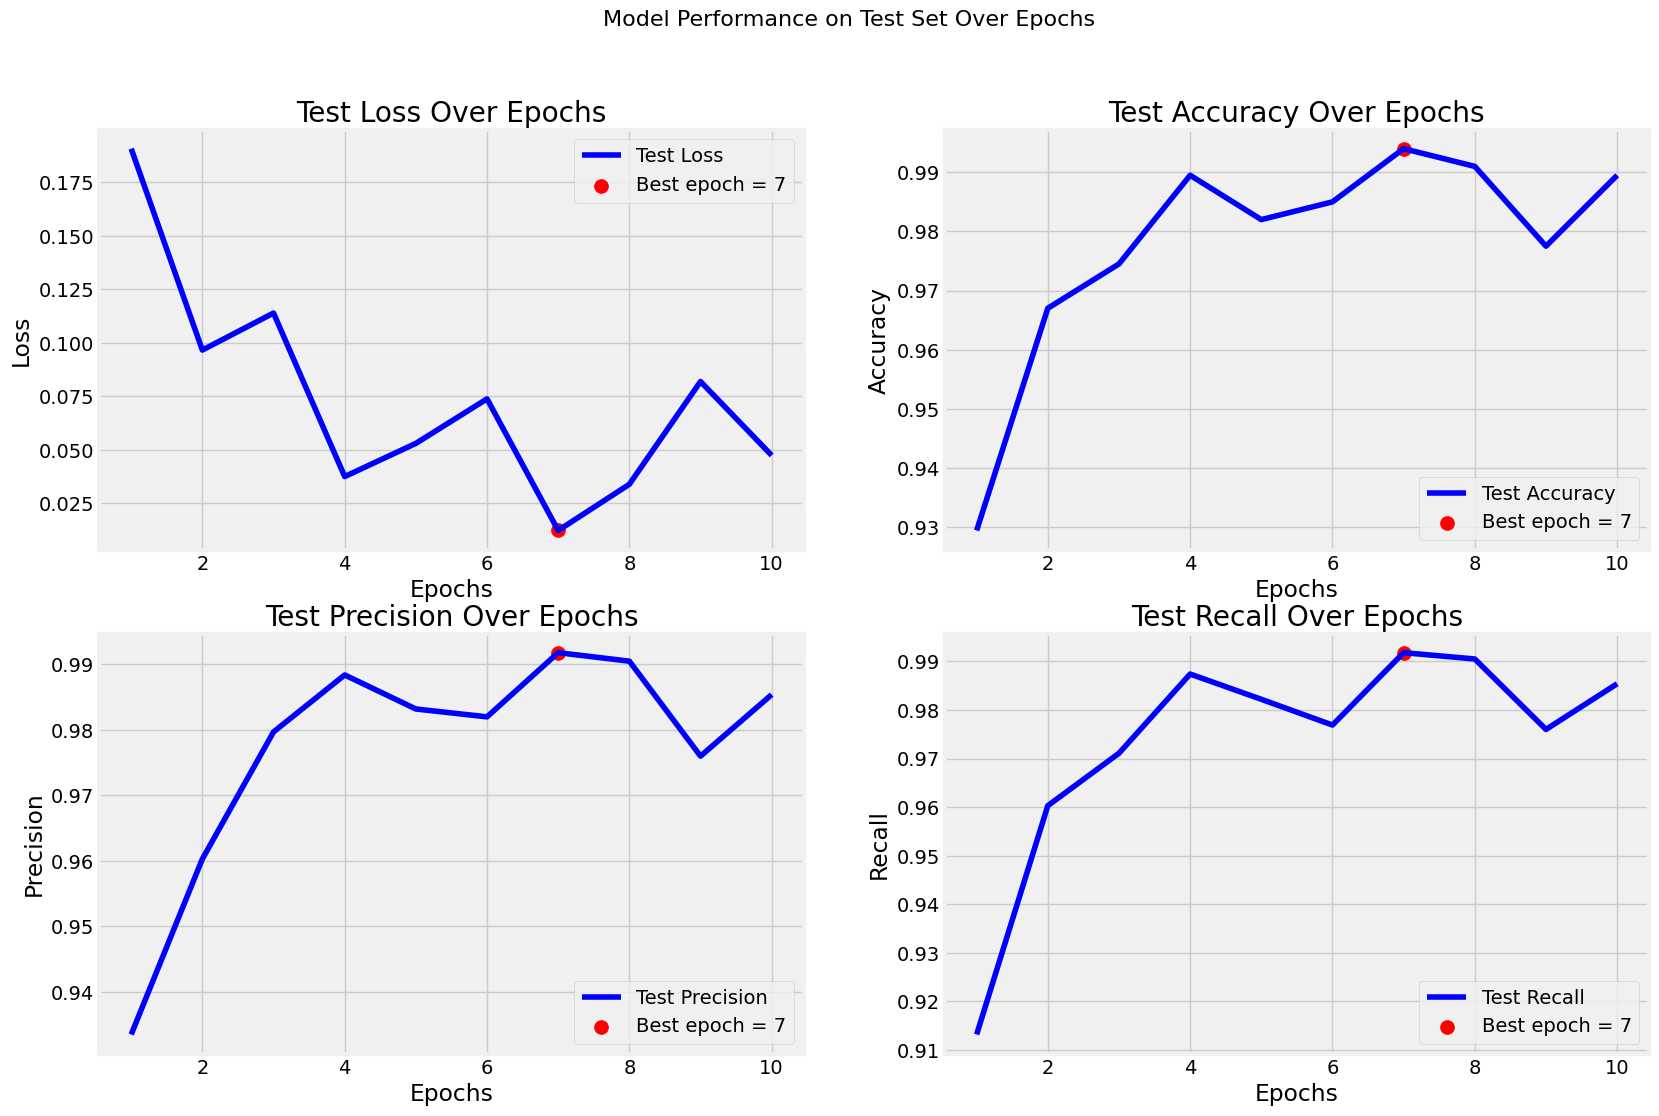

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
Epochs = range(1, len(test_history['loss']) + 1)

# Plot metrics
metrics_to_plot = {
    'Loss': test_history['loss'],
    'Accuracy': test_history['accuracy'],
    'Precision': test_history['precision'],
    'Recall': test_history['recall']
}

for i, (metric, values) in enumerate(metrics_to_plot.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(Epochs, values, 'b', label=f'Test {metric}')

    # Find best epochs
    if metric == 'Loss':
        best_epoch = np.argmin(values) + 1
        best_value = values[best_epoch - 1]
        plt.scatter(best_epoch, best_value, s=100, c='red', label=f'Best epoch = {best_epoch}')
    else:
        best_epoch = np.argmax(values) + 1
        best_value = values[best_epoch - 1]
        plt.scatter(best_epoch, best_value, s=100, c='red', label=f'Best epoch = {best_epoch}')

    plt.title(f'Test {metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Performance on Test Set Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)a
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/182 ━━━━━━━━━━━━━━━━━━━━ 2331s 13s/step - accuracy: 0.9984 - loss: 0.0039 - precision: 0.9985 - recall: 0.9984
21/21 ━━━━━━━━━━━━━━━━━━━━ 211s 11s/step - accuracy: 0.9879 - loss: 0.0304 - precision: 0.9879 - recall: 0.9879
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.9910 - loss: 0.0332 - precision: 0.9910 - recall: 0.9910
Train Loss: 0.0034
Train Accuracy: 99.88%
--------------------
Validation Loss: 0.0446
Validation Accuracy: 98.65%
--------------------
Test Loss: 0.0335
Test Accuracy: 99.10%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

#Model Confusion Plot


In [ ]:
class_dict = tr_gen.class_indices
conf_matrix = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

#Save & Load Model


In [ ]:
# Save the entire model
model.save('my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('my_model.keras')

#MRI Tumor Detection System


In [ ]:
def predict(img_path):
    label = list(class_dict.keys())
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)

    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence_score = np.max(predictions, axis=1)[0]


    # Determine the class
    if label[predicted_class_index] == 'notumor':
        result = "No Tumor"
    else:
        result = f"Tumor: {label[predicted_class_index]}"

    # Display the image with the prediction
    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
    plt.show()

In [ ]:
image_path = '/content/drive/My Drive/ColabNotebooks/testing/meningioma/Te-meTr_0009.jpg'
predict(image_path)

In [ ]:
image_path = '/content/drive/My Drive/ColabNotebooks/testing/notumor/Te-noTr_0004.jpg'
predict(image_path)

In [ ]:
image_path = '/content/drive/My Drive/ColabNotebooks/testing/pituitary/Te-piTr_0003.jpg'
predict(image_path)

In [ ]:
image_path = '/content/drive/My Drive/ColabNotebooks/testing/glioma/Te-gl_0015.jpg'
predict(image_path)